# Shopify Data Analysis Challenge

## Q1: Analyzing sneaker shop data

### We will import the data first

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sneakerOrders = pd.read_csv('SneakerShopDataSheet.csv')

In [3]:
sneakerOrders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


Naive analysis gives average order value (AOV) $3145.13

### a) What went wrong with this calculation?

First I'll try to reproduce the calculation that got the above AOV

In [4]:
sum(sneakerOrders['order_amount'])/5000

3145.128

In [5]:
sneakerOrders.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,2500.500000,50.078800,849.092400,3145.128000,8.78720
std,1443.520003,29.006118,87.798982,41282.539349,116.32032
min,1.000000,1.000000,607.000000,90.000000,1.00000
25%,1250.750000,24.000000,775.000000,163.000000,1.00000
50%,2500.500000,50.000000,849.000000,284.000000,2.00000
75%,3750.250000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,704000.000000,2000.00000


We see that the AOV is 3145.13 but the standard deviation is quite high at 41282.54, furthermore even our 75% percentile is quite low compared to the mean at $390. This is indicative of outliers in our dataset, so let's try and find them.

#### Finding the outliers 

We will find outliers using the Inter-quartile range method

Text(0.5, 1.0, 'Boxplot of order amounts')

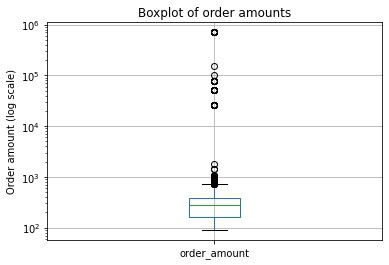

In [34]:
ax = sneakerOrders.boxplot(column = 'order_amount', return_type = 'axes')
ax.set_yscale('log')
ax.set_ylabel('Order amount (log scale)')
ax.set_title('Boxplot of order amounts')

We can clearly see from the boxplot that there are significant outliers in our dataset, thus we will filter them out

In [7]:
Q1 = sneakerOrders['order_amount'].quantile(0.25) 
Q3 = sneakerOrders['order_amount'].quantile(0.75) 
IQR = Q3-Q1
fences = (Q1-IQR*1.5, Q3 + IQR*1.5)

In [8]:
modifiedSneakerOrders = sneakerOrders.loc[sneakerOrders['order_amount'].between(fences[0],fences[1])]
modifiedSneakerOrders

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11
...,...,...,...,...,...,...,...
4995,4996,73,993,330,2,debit,2017-03-30 13:47:17
4996,4997,48,789,234,2,cash,2017-03-16 20:36:16
4997,4998,56,867,351,3,cash,2017-03-19 5:42:42
4998,4999,60,825,354,2,credit_card,2017-03-16 14:51:18


Next we compute summary statistics for our modified dataset (without the outliers)

In [9]:
modifiedSneakerOrders.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4859.000000,4859.000000,4859.000000,4859.000000,4859.000000
mean,2497.395966,49.852645,849.905742,293.715374,1.950196
std,1443.356555,29.049171,86.887496,144.453395,0.919791
min,1.000000,1.000000,700.000000,90.000000,1.000000
25%,1244.500000,24.000000,776.000000,162.000000,1.000000
50%,2498.000000,50.000000,850.000000,280.000000,2.000000
75%,3749.500000,74.000000,925.000000,380.000000,3.000000
max,5000.000000,100.000000,999.000000,730.000000,5.000000


We find that the mean and standard deviation have drastically dropped and are much more reasonable at 293.72 and 144.5

### b) Better metrics to report for this dataset


It depends on what we are tring to learn from the dataset. These are some reasons for analysis and what I'd report in each case. I'd divide them into two categories $\textbf{platform insights}$ and $\textbf{shop-specific insights}$.

$\textbf{Platform insights}$, are insight about the distribution of orders on our platform, and this comes from analyzing the distribution from the provided dataset.

***
$\textbf{1)}$ If what we are trying to learn is some value that "describes" the majority of the orders, then I'd report the median of the dataset, as it is a measure of central tendency that is more robust to outliers than the mean. (I'd also report the mean and variance calculated above to show that the distribution is skewed and justify our usage of the median)


In [10]:
sneakerOrders['order_amount'].median()

284.0

We see that the median is 284 (notice how this is relatively close to the mean of the filtered dataset which was 293.72)

***
$\textbf{2)}$ If we are trying to get insights about what the most common order value/range, say to design a strategy that targets the majority of the customers on the platform, then we should report the mode.

In [11]:
sneakerOrders['order_amount'].mode()

0    153
dtype: int64

The mode for the dataset is 153, however if we plot (below) the histogram around the the bulk of the dataset i.e without the outliers (we could just plot the filtered dataset's histogram that gives us a detailed view as well, since the outliers won't contribute to the mode..), we note that the data seems to have also other closes candidates for a mode in the ranges of 250-260, 300-320 and 350-360, which we might need to take note of.

Text(0.5, 1.0, 'Histogram of order amounts (50 bins)')

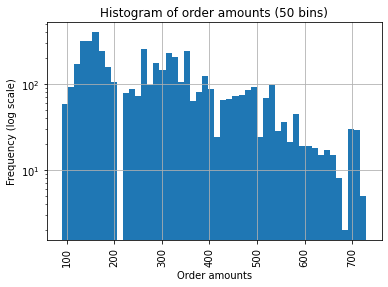

In [53]:
fig, ax = plt.subplots()
modifiedSneakerOrders.hist(column='order_amount', bins=50, ax=ax, xrot=90)
ax.set_yscale('log')
ax.set_ylabel('Frequency (log scale)')
ax.set_xlabel('Order amounts')
ax.set_title('Histogram of order amounts (50 bins)')

However this data seems multi-modal with modes in the 150-160 range as well as modes in the 300-320 range and 350

***
$\textbf{3)}$ For more involved insights its best to use the whole distribution, for reporting purposes we can visualize it plotting a histogram for e.g, as well as report the modified distribution's histogram (above) for more detailed inisght regarding the bulk of the dataset

Text(0.5, 1.0, 'Histogram of order amounts (50 bins)')

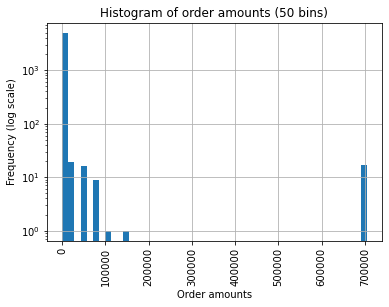

In [47]:
fig, ax = plt.subplots()
sneakerOrders.hist(column='order_amount', bins=50, ax=ax, xrot=90)
ax.set_yscale('log')
ax.set_ylabel('Frequency (log scale)')
ax.set_xlabel('Order amounts')
ax.set_title('Histogram of order amounts (50 bins)')

On the other hand if I was tasked with giving $\textbf{shop-specific insights}$ to each shop, then we would work with the distribution of orders specific to the site (by splitting the dataset) and possibly "similar" sites to give them market insights, and possibly do the same calculations above for these shops.

### c) One value to report


If I had to report one value that best describes most of the orders it would be the median which is 284

## Q2: SQL

### a)

SELECT Count(OrderID) FROM Orders INNER JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID WHERE ShipperName = 'Speedy Express'

#### Final Answer: 54

***
### b)

SELECT MAX(NumOfOrders), LastName FROM ( SELECT Count(OrderID) as NumOfOrders, LastName FROM Orders INNER JOIN Employees WHERE Orders.EmployeeID = Employees.EmployeeID GROUP BY LastName)

#### Final Answer: Peacock with 40 orders

***
### c)

There are two interpretations for the question:
To count the number of times a product type was ordered, without comparing the respective number of units ordered we run the following command (this sort of analysis could still be useful since we are comapring products with different units of consumption e.g the average coffee package is probably exhausted faster than the average syrup bottle, hence more units will be ordered in a given time frame)

SELECT MAX(NumOfProducts), ProductName FROM (SELECT Count(ProductName) as NumOfProducts, ProductName FROM Orders INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID INNER JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID INNER JOIN Products ON Products.ProductID = OrderDetails.ProductID WHERE Country = 'Germany' GROUP BY ProductName)

#### Final Answer: Gorgonzola Telino, ordered 5 times

To count the number of units ordered we run the following command

SELECT MAX(NumOfUnits), ProductName FROM (SELECT SUM(Quantity) AS NumOfUnits, ProductName FROM Orders INNER JOIN Customers ON Orders.CustomerID = Customers.CustomerID INNER JOIN OrderDetails ON OrderDetails.OrderID = Orders.OrderID INNER JOIN Products ON Products.ProductID = OrderDetails.ProductID WHERE Country = 'Germany' GROUP BY ProductName)

#### Final Answer: Boston Crab Meat with 160 units ordered